In [41]:
import numpy as np
import pandas as pd

In [65]:
# 1(a) Import the given “Salary_Data.csv”
df = pd.read_csv('C:\\Users\\makut\\Downloads\\datasets\\datasets\\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [66]:
A = df.iloc[:, :-1].values   #excluding last column i.e., years of experience column
B = df.iloc[:, 1].values     #only salary column

In [44]:
# (b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
from sklearn.model_selection import train_test_split 
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=1/3, random_state=0)

In [45]:
# (c) Train and predict the model.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(A_train, B_train)
B_Pred = reg.predict(A_test)
B_Pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [46]:
# (d) Calculate the mean_squared error
S_error = (B_Pred - B_test) ** 2
Sum_Serror = np.sum(S_error)
mean_squared_error = Sum_Serror / B_test.size
mean_squared_error

21026037.329511296

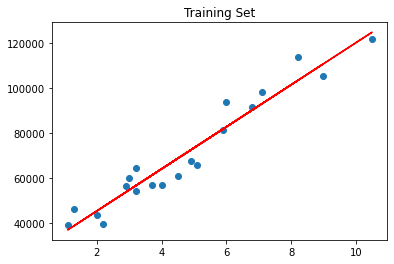

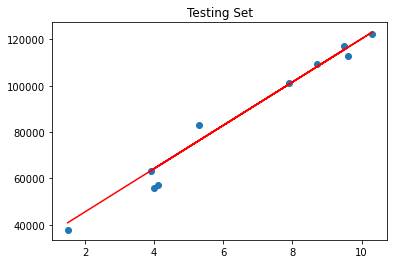

In [47]:
# (e) Visualize both train and test data using scatter plot.
import matplotlib.pyplot as plt
# Training Data set
plt.scatter(A_train, B_train)
plt.plot(A_train, reg.predict(A_train), color='red')
plt.title('Training Set')
plt.show()

# Testing Data set
plt.scatter(A_test, B_test)
plt.plot(A_test, reg.predict(A_test), color='red')
plt.title('Testing Set')
plt.show()

In [67]:
# (2) Apply K means clustering in the dataset provided:

k_mean = pd.read_csv('C:\\Users\\makut\\Downloads\\datasets\\datasets\\K-Mean_Dataset.csv')
k_mean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [49]:
k_mean.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [50]:
# Remove any null values by the mean.
m1=k_mean['CREDIT_LIMIT'].mean()
m2=k_mean['MINIMUM_PAYMENTS'].mean()
k_mean['CREDIT_LIMIT'].fillna(value=m1, inplace=True)
k_mean['MINIMUM_PAYMENTS'].fillna(value=m2, inplace=True)

In [51]:
k_mean.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [52]:
x = k_mean.iloc[:,1:]   #iloc is used to select a specific row or column    

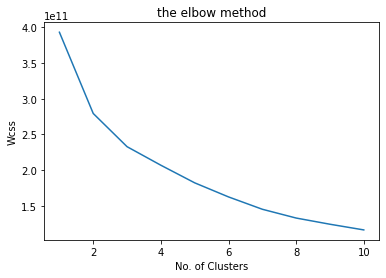

In [53]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #inertia calculates how well a data was clustered by K-Means

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()


In [61]:
#Calculate the silhouette score for the above clustering
nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

y_cluster_kmeans = km.predict(x)
from sklearn import metrics
scr = metrics.silhouette_score(x, y_cluster_kmeans)
print(scr)


0.46675588595465034


In [55]:
# feature scaling using standard scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_arr = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_arr, columns = x.columns)

In [62]:
#  Calculate the silhouette score for the above clustering 

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
scr = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(scr)

0.25055570796307736
